# Lab 3: Population, Sampling, Bias for Penn State DS 200

## Acknowledgements: 
This lab is adopted from a lab of data 8 course at University of California, Berkeley.  I also wish to thank Dr. Matthew Beckman (in Department of Statistics) for contributing to the revision of the lab for the purpose of its use in DS 200.

- Fall 2020
- Instructor: Professor John Yen
- TA: Rupesh Prajapati
- LA: Nathan Tack

We will introduce the important two important concepts in statistics: sampling and randomness [randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

## Learning Objectives:
- Be able to understand, through hands-on experiment, the relationship between the size of random sampling and the accuracy of statistical inference/estimates
- Be able to understand the difference between random sampling and non-random sampling

## Exercises:
- 1: 5 points
- 2: 5 points
- 3: 5 points
- 4: 5 points
- 5: 5 points
- 6: 10 points
- 7: 8 points
- 8: 12 points

## Total Points: 55 points

## Due: 5 pm, September 14th


In [1]:
!pip install datascience

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79980 sha256=68554e71dc59663acd89ef415458d7ba66c6023da1cf93ad71477bf87aa61e10
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [2]:
# Run this cell to import relevant Python modules. Please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# Mount Google Drive
Like the previous 2 labs, we need to mount Google Drive so that we can read data files from Google Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy Data Files into DS200Labs in your Google Drive

Like the previous 2 labs, download the following two data files from Canvas, upload them to DS200Labs in your Google Drive.
- player_data.csv
- salary_data.csv

After you have done this, run the following "ls" command to make sure these two files are in the DS200Labs directory.

In [4]:
!ls /content/drive/My\ Drive/DS200Labs

IMDB5000movies.csv  player_data.csv  salary_data.csv  SFSalaries2011_2014.csv


# Read Data from DS200Labs in your Google Drive using Table.read_table

Like the previous labs, we read the two data files needed for the lab from DS200Labs using 
```
Table.read_table(path)
```
where path is a variable whose value is the path to a data file.

In [5]:
path1 = "/content/drive/My Drive/DS200Labs/player_data.csv"
player_table = Table.read_table(path1)
player_table.show(10)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
Jimmy Butler,25,CHI,65,379,212,114,36,93,1301
Damian Lillard,24,POR,82,378,507,97,21,222,1720
Russell Westbrook,26,OKC,67,488,574,140,14,293,1886
Pau Gasol,34,CHI,78,919,210,25,147,158,1446
Kyrie Irving,22,CLE,75,237,389,114,20,186,1628


In [6]:
path2 = "/content/drive/My Drive/DS200Labs/salary_data.csv"
salary_table = Table.read_table(path2)
salary_table.show(10)

PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790
Carmelo Anthony,22458401
Dwight Howard,21436271
LeBron James,20644400
Chris Bosh,20644400
Chris Paul,20068563
Deron Williams,19754465
Rudy Gay,19317326


### Python: Conditionals and Random Choice

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. 

Run the cell below to see an example of a comparison operator in action.

In [7]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [8]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [9]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False])

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. 

## Exercise 1 (5 points)
Run the cell below three times, and observe how the results may differ between these runs.

In [10]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'both'

In [11]:
np.random.choice(nachos)

'cheese'

In [12]:
np.random.choice(nachos)

'neither'

To repeat this process multiple times, pass in an int `n` as the second argument. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [13]:
np.random.choice(nachos, 10)

array(['salsa', 'cheese', 'neither', 'neither', 'cheese', 'both',
       'cheese', 'both', 'neither', 'neither'], dtype='<U7')

## 2. Sampling Basketball Data

Join the player_table and salary_table on Player's Name (i.e.,"Name" in the player_table, and "PlayerName" in the salary_table) so that one table contains both the performance data and the salary of each player.

In [14]:
performance_salary_table = player_table.join("Name", salary_table, "PlayerName")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
performance_salary_table.show(5)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000


Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make statistical inferences about a large underlying population using a smaller sample.

### Using a Sample to Estimate the Population

A *statistical inference* is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences, unlike, say, logical inferences, can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

One very important factor in the utility of samples is how they were gathered.  We have prepared some example sample datasets to simulate inference from different kinds of samples for the NBA player dataset.  Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


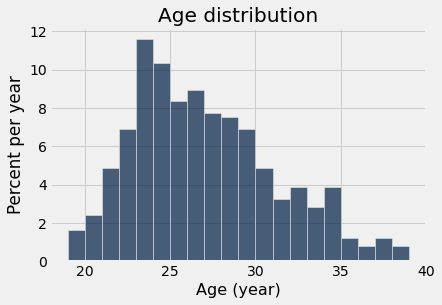

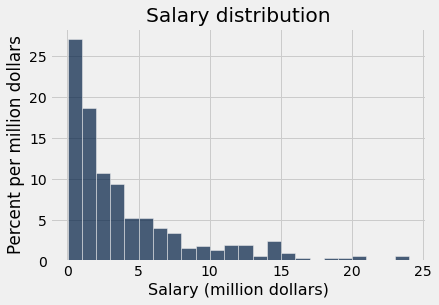

In [15]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(performance_salary_table)
print('Two histograms should be displayed below')

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

### Exercise 2 (5 points)
Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.
#### Hint: where("Age", are.above(...)) or where("Age", are.below(..)) can be useful here.

In [16]:
convenience_sample = performance_salary_table.where("Age", are.below(22) )
convenience_sample

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Alex Len,21,PHO,69,454,32,34,105,74,432,3649920
Andre Drummond,21,DET,82,1104,55,73,153,120,1130,2568360
Andrew Wiggins,19,MIN,82,374,170,86,50,177,1387,5510640
Anthony Bennett,21,MIN,57,216,48,27,16,36,298,5563920
Anthony Davis,21,NOP,68,696,149,100,200,95,1656,5607240
Archie Goodwin,20,PHO,41,74,44,18,9,48,231,1112280
Ben McLemore,21,SAC,82,241,140,77,19,138,996,3026280
Bradley Beal,21,WAS,63,241,194,76,18,123,962,4505280
Bruno Caboclo,19,TOR,8,2,0,0,1,4,10,1458360


### Like Lab 2, you can generate basic statistics (e.g., min value, max value, medium, sum) for each column using .stats() of Table.

In [17]:
performance_salary_table.stats()

statistic,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
min,A.J. Price,19,ATL,1,0,0,0,0,0,0,14409
max,Zoran Dragic,38,WAS,83,1226,838,163,200,321,2217,2.35e+07
median,,26,,61,176,69.5,32,14,55.5,420.5,2.34926e+06
sum,,13056,,25981,106504,54202,19031,11797,33725,246035,2.10073e+09


### Exercise 3 (5 points)
Comput the statistical information of the players generated by the convenience sample.  Compare the statistical information of Salary between the entire population (of NBA players) with those generated from the convenient sample.  Write your answer in the text cell after the next code cell (which starts with "Answer to Exercise 3")

In [18]:
convenience_sample.stats()

statistic,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
min,Aaron Gordon,19,ATL,1,0,0,0,0,1,2,507336
max,Zach LaVine,21,WAS,82,1104,533,142,200,203,1656,5.60724e+06
median,,21,,56,150.5,60,33,12,50,352.5,1.92048e+06
sum,,896,,2280,9288,3993,1792,1403,3069,19425,1.04875e+08


### Answer to Exercise 3:  

The sample minimum salary is higher than entire population, players who are 22 years old or above, the minimum salary is 14409, the players who are below 22 years old, the minimum salary is 507336. The entire population has a higher maximum salary, median and sum than convenient sample, so the older players may have higher salary.

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; **just run it**.

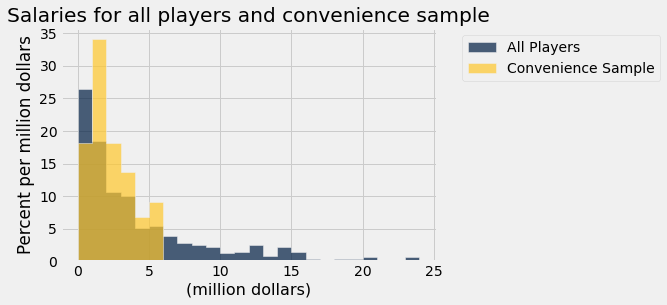

In [19]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    first_salary_in_millions = first.column('Salary')/1000000
    second_salary_in_millions = second.column('Salary')/1000000
    first_tbl_millions = first.drop('Salary').with_column('Salary', first_salary_in_millions)
    second_tbl_millions = second.drop('Salary').with_column('Salary', second_salary_in_millions)
    max_salary = max(np.append(first_tbl_millions.column('Salary'), second_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second_tbl_millions.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(performance_salary_table, convenience_sample, 'All Players', 'Convenience Sample')

### Exercise 4 (5 points)
Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general?  Before you move on, write a short answer in English below.  You can refer to the statistics calculated above or perform your own analysis.

### Your Answer for Exercise 4: 
The convenience sample is not accurate for the full population. The most of players' salaries are 0-1 million in full population, the sample is between 0-2 million, and the distribution is not accurate since the sample doesn't have salary data for the 6 million above.

## Learning Tips:

- The term "convenient" in convenient sampling refers to a sampling method that is not random sampling, but chosen because it is convient (less costly) to conduct. For example, distributing and collecting a political survey among participants of a gathering event for a presidential candidate is an example of convenient sampling. 
- While random sampling is preferred to convenient sampling, not all convenient sampling methods are identical in terms of the potential bias it can introduce.

## Sampling Bias

Sampling bias is a sampling method that certain members of the population have a higher probability to be selected, while some other members of the population have a lower probability to be selected.  A convenience sampling method introduces a sampling bias. For example, conducting a survey by distributing a survey in front of HUB introduces a sampling bias (i.e., higher sampling probablity) toward students who visit HUB often.

## Sampling in Data Science

The goal of sampling from a large population in Data Science is typically to have a feasible data gathering method that provides a dataset that is **representative** for the population so that analytics results or models generated from the dataset can be applicable to the population of interest.  In order for the sample to be representative of the population of interest,
undesired sampling bias needs to be avoided. Are there situations in which certain sampling bias is 
actually desirable?

# Desired vs Undesired Sampling Bias

Suppose you are interested in analyzing social networks (following, followed-by relationships) among twitter users who are involved in generating, liking, or conversations about **tweets relate to the hashtag #PutACanOnIt**, a desired sampling bias in this case is tweets that include the hashtag #PuACanOnIt.  Twitter provides API that enables sampling tweets randomly or based on its content.  One of the common ways to gather tweets from the real-time Twitter streaming data is to use a list of words and hashtags such that any tweets that mention one or more these words or hashtags are sampled through a Twitter API.  Other ways to sample tweets include sampling tweets from a specific Twitter user, sampling tweets (that include geo-tag) from a specific rectangle area (defined by two geo-location coordinates). 


# Simple Random Sampling
A more justifiable approach than convient sampling is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

## Sampling without Replacement vs Sampling with Replacement

When the population is large, which is often the case for a Data Science project, sampling without replacement is more often used in practice.  For example, a subject typically participates a specific Phase of a drug's Clinical Trial only once.

Sampling with Replacement has a benefit in terms of mathematical and statistical analysis of a sampling method, since the drawing of each sample is independent of each other.  However, when the size of sample is much smaller than the size of population, mathematical/statistical analysis of the method can be approximated by viewing it as Sampling with Replacment.  This can be justified because the change to the population after drawing a small sample from a large population is so tiny that it can be ignored.

## Size of Random Sampling 

In a Data Science project, it is often useful to take random samples even when we have the data for the whole population.  For example, we may want to
sample from a set of tweets gathered for the purpose of tagging their sentiment (e.g., positive
or negative) so that we can use the tagged tweets to build a model to infer the sentiment of tweets.

In this lab, we use random sampling provided by Datascience Python module to helps us to understand sampling accuracy.

### The `sample` Method of Table

The table method `sample` produces a random sample from the table. By default, it draws at random *with replacement* from the rows of a table. 
However, it can perform random sampling **without replacment** by specifying the optional argument
`with_replacement=False`.

The `sample` method takes in the sample size as its argument and returns a *table* with only the rows that were selected. 

Run the cell below to see an example random sampling from the NBA player table that contains both their performance and their salary.

In [20]:
# Just run this cell

tiny_sample=performance_salary_table.sample(20, with_replacement=False)

In [21]:
tiny_sample.stats()

statistic,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
min,Al-Farouq Aminu,20,CHO,3,1,1,0,0,0,2,29843
max,Will Bynum,37,WAS,82,1226,619,163,200,249,1900,1.57191e+07
median,,26,,68.5,223.5,59,43.5,27,70.5,451,3.32496e+06
sum,,531,,1164,6636,2110,929,1022,1531,11771,8.92229e+07


### Exercise 5 (5 points)
Produce a simple random sample of size 44 from `performance_salary_table`. Run your analysis on it again.  Run the cell a few times to see how the statistics change across different samples.

- How much does the median salary change across samples? 
- How much does the median salary of the sample differ from the median salary of the whole population?

In [44]:
my_small_srswor_data = performance_salary_table.sample(44, with_replacement=False)
my_small_srswor_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Anthony Bennett,21,MIN,57,216,48,27,16,36,298,5563920
Tony Snell,23,CHI,72,176,62,32,11,48,435,1472400
Tiago Splitter,30,SAS,52,252,78,35,37,60,428,9250000
Mike Miller,34,CLE,52,91,46,14,4,23,109,2732000
Tyler Hansbrough,29,TOR,74,265,21,30,15,20,270,3326235
Lavoy Allen,25,IND,63,323,73,15,42,40,315,948163
DeMarcus Cousins,24,SAC,59,747,210,90,103,254,1421,14746000
Jameer Nelson,32,TOT,63,146,253,47,6,109,523,2732000
Noah Vonleh,19,CHO,25,86,4,4,9,11,83,2524200
Ricky Rubio,24,MIN,22,125,193,38,1,64,226,5070686


In [45]:
my_small_srswor_data.stats()

statistic,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
min,Aaron Brooks,19,BOS,4,3,0,0,0,1,6,379010
max,Vince Carter,38,WAS,82,775,449,152,189,254,1513,1.4746e+07
median,,25,,62.5,183,73.5,31,15,55,399,2.13098e+06
sum,,1164,,2485,10553,4563,1770,1270,3046,21209,1.46945e+08


In [24]:
performance_salary_table.stats()

statistic,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
min,A.J. Price,19,ATL,1,0,0,0,0,0,0,14409
max,Zoran Dragic,38,WAS,83,1226,838,163,200,321,2217,2.35e+07
median,,26,,61,176,69.5,32,14,55.5,420.5,2.34926e+06
sum,,13056,,25981,106504,54202,19031,11797,33725,246035,2.10073e+09


### Answer to Exercise 5: 
The sample median changes between 1.57e+06 and 3.04e+06. The median of sample is closed to the whole population, it is around 0.5e+06 between the whole popution median in most of time.

### Exercise 6 (10 points)
As in the previous question, analyze several simple random samples of size 100 from `performance_salary_table`.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44? 
- How does the sample median salary and histograms of the larger sample compare to the median salary and histogram of the entire population?
- Is there a relationship between the size of a sample of the deviation of the sample's median salary from the median of the entire population?

In [42]:
my_large_srswor_data = performance_salary_table.sample(100, with_replacement= False)
my_large_srswor_data.stats()

statistic,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
min,Alexey Shved,19,ATL,3,1,0,0,0,2,3,35000
max,Zoran Dragic,38,WAS,82,717,720,152,110,293,1886,2.3411e+07
median,,25.5,,51.5,135,62,30,10,47,324.5,2.0576e+06
sum,,2596,,4834,18126,10496,3692,1691,6228,45805,4.07245e+08


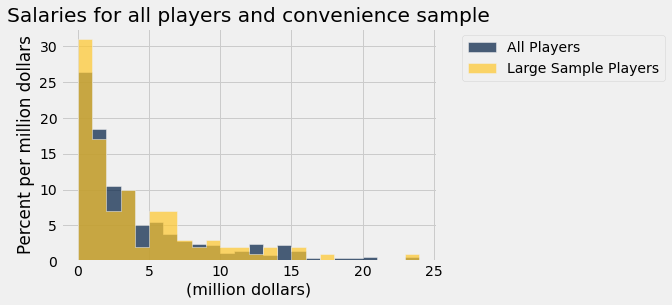

In [43]:
compare_salaries(performance_salary_table, my_large_srswor_data, 'All Players', 'Large Sample Players')

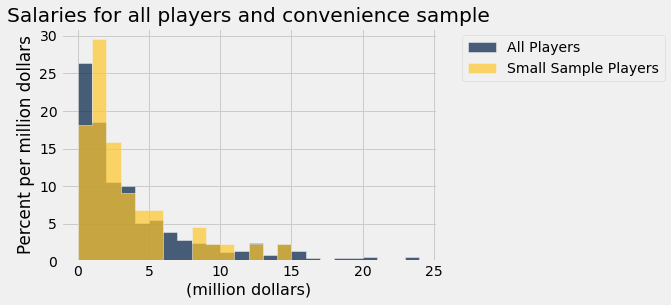

In [46]:
compare_salaries(performance_salary_table, my_small_srswor_data, 'All Players', 'Small Sample Players')

### Answer to Exercise 6:
The size 100 histogram shapes change more accurately than size 44. For the large sample players, the distribution is almost overlap with the entire population. The size of a sample is larger, the deviation of the sample's median salary from entire population is smaller.

## Exercise 7 (8 points)

The process of approving a vaccine by FDA aims to assure both (1) effectiveness of the vaccine against a virus, and (2) minimal side effects. The process includes three stages of **Clinical Trials**:
- Phase 1: Involves a small number of subjects (15-30). Aim to find the best dose with fewest side effects.
- Phase 2: Involves hundreds of subjects. Further test safety and effectivenss of the vaccine.
- Phase 3: Involves thousands of subjects.  Comprehensive further evaluation of the vaccine on a large sample.

Answer the following questions from the viewpoint of sampling:
- A (4 points) : Why phase 3 is needed?
- B (4 points) : Why not go directly from phase 1 to phase 3 (i.e., why phase 2 is needed)?

## Answer to Exercise 7
- Answer to Exercise 7A:  Larger sample is more accurate. The enough samples allow for better research on short-lived and long-lasting side effects and safety.
- Answer to Exercise 7B: Phase 2 tests specific type of patients, it further test safety and effectivenss, assess the side effects of each drug and which drug works better. 

## Exercise 8 (12 points)
A university conducts a pre-arrival testing of Covid-19 to assess the risk among student populations and to reduce the risk of Covid-19 infection on campus.  The entire student population is divided into two groups based on regions where the student reside: (1) A high risk group (for students living in one of the high-risk region), and (2) a normal risk group (for students not living in a high risk region). As a result, 20% of the student population are from a high risk area, and 80% of the student population are from a normal risk area. The pre-arrival testing protocol of the university samples the student population as follows:
- Ten percent (10%) of the students from the high-risk regions are randomly sampled for testing Covid-90 virus.
- Three percent (3%) of the students from the normal risk regions are randomly sampled for testing Covid-90 virus.

The outcome of this pre-arrival testing is the following:

- Among students from the high-risk regions, fifteen percent (15%) of them test positive.
- Among students from the normal regions regions, three percent (3%) of them test positive.

As a part of the pre-arrival testing protocol, all sampled students who had positive Covid-19 test result are asked to not arrive on campus and participate classes through remote learning. Answer the following two questions (** Note: Show the formula of your calculation as well as the final results. **):

- A (3 points) : Assuming the Covid-19 test has neither false positive (i.e., testing result is positive for a person who does not carry Covid-19 virus) nor false negative (i.e., testing result is negative for a person who actually carries Covid-19 virus), what is the estimate percentage of the positive Covid-19 cases among the entire student population (regardless where they are after the school starts).
- B (3 points) : Assuming all students who had positve Covid-19 test results follow the pre-arrival protocol to not to return to campus,  what is the estimated percentage of the positive Covid-19 cases among students who return to campus? 
- C (6 points) : What are the benefits of using a higher sampling rate for the students from the high risk regions? 

A: 10% x15% +3% x3% =1.59%

B: 1.59%

C: Students who are in higher risk regions may have higher posibility to carry virus, so if using a higher sampling rate, the accuracy will be higher.

Congratulations, you're done with Lab 4!  Be sure to 
- **Save this notebook** from the `File` menu. 
- **Convert the notebook to HTML file** following the instruction provided in Lab 1.
- **Submit the HTML files to Canvas** as Lab 3 Assignment.